In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

import pickle

In [32]:
df = pd.read_csv('../datasets/original/dataset.csv')
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"Jul 31, 2022","23,303.4","23,634.2","24,179.3","23,236.2",138.84K,-1.40%
1,"Jul 30, 2022","23,634.2","23,774.2","24,605.3","23,521.8",168.72K,-0.59%
2,"Jul 29, 2022","23,774.3","23,850.2","24,340.0","23,451.4",221.66K,-0.32%
3,"Jul 28, 2022","23,850.0","22,957.7","24,190.5","22,611.6",268.32K,3.88%
4,"Jul 27, 2022","22,958.3","21,248.0","23,027.8","21,047.5",242.66K,8.05%


# Data Preprocessing

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308 entries, 0 to 1307
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      1308 non-null   object
 1   Price     1308 non-null   object
 2   Open      1308 non-null   object
 3   High      1308 non-null   object
 4   Low       1308 non-null   object
 5   Vol.      1308 non-null   object
 6   Change %  1308 non-null   object
dtypes: object(7)
memory usage: 71.7+ KB


In [34]:
df.describe()

,Date,Price,Open,High,Low,Vol.,Change %
count,1308,1308,1308,1308,1308,1308,1308
unique,1308,1305,1300,1296,1306,1255,792
top,"Mar 30, 2022","7,196.4","9,300.5","8,145.5","9,533.6",1.05M,-0.62%
freq,1,2,2,2,2,6,6


In [35]:
df.describe().T

,count,unique,top,freq
Date,1308,1308,"Mar 30, 2022",1
Price,1308,1305,"7,196.4",2
Open,1308,1300,"9,300.5",2
High,1308,1296,"8,145.5",2
Low,1308,1306,"9,533.6",2
Vol.,1308,1255,1.05M,6
Change %,1308,792,-0.62%,6


In [36]:
# NA Value
df.isna().sum() / df.shape[0]

Date        0.0
Price       0.0
Open        0.0
High        0.0
Low         0.0
Vol.        0.0
Change %    0.0
dtype: float64

In [37]:
print("Column", df.shape[1])
print("Row", df.shape[0])

Column 7
Row 1308


In [38]:
# NA Value
df.isnull().sum() / df.shape[0]

Date        0.0
Price       0.0
Open        0.0
High        0.0
Low         0.0
Vol.        0.0
Change %    0.0
dtype: float64

In [39]:
# Duplicate value
df.duplicated().sum() / len(df) * 100

0.0

In [40]:
df.head(5)

,Date,Price,Open,High,Low,Vol.,Change %
0,"Jul 31, 2022","23,303.4","23,634.2","24,179.3","23,236.2",138.84K,-1.40%
1,"Jul 30, 2022","23,634.2","23,774.2","24,605.3","23,521.8",168.72K,-0.59%
2,"Jul 29, 2022","23,774.3","23,850.2","24,340.0","23,451.4",221.66K,-0.32%
3,"Jul 28, 2022","23,850.0","22,957.7","24,190.5","22,611.6",268.32K,3.88%
4,"Jul 27, 2022","22,958.3","21,248.0","23,027.8","21,047.5",242.66K,8.05%


In [41]:
df.drop(['Date', 'Vol.', 'Change %'],1, inplace = True)

In [42]:
prediction_days = 30
df["Prediction"] = df[["Price"]].shift(-prediction_days)
df.dropna(inplace=True)

In [43]:
# create the independent dataset

# convert the dataset into numpy array
x = np.array(df.drop(["Prediction"], 1))

# Remove the last 30
x = x[:len(df)-prediction_days]


# remove comma in every element
for key, i in enumerate(x):
  for index, j in enumerate(i):
    j = j.replace(",", "")

    j = float(j)  # convert to float
    i[index] = j  # assigned the value
  
  x[key] = i  # assign the value to the key
  
print(x)

[[23303.4 23634.2 24179.3 23236.2]
 [23634.2 23774.2 24605.3 23521.8]
 [23774.3 23850.2 24340.0 23451.4]
 ...
 [3715.9 3809.7 3828.4 3681.8]
 [3809.5 3823.2 3836.6 3789.7]
 [3823.1 3821.9 3843.2 3783.6]]


In [44]:
# create dependent dataset
y = np.array(df["Prediction"])

# get all of the value except the last 30 row
y = y[:-prediction_days]
print(y)


['19,262.9' '19,926.6' '20,111.3' ... '3,502.5' '3,467.9' '3,437.2']


In [45]:
y = y.reshape(-1, 1)
print(y)


[['19,262.9']
 ['19,926.6']
 ['20,111.3']
 ...
 ['3,502.5']
 ['3,467.9']
 ['3,437.2']]


In [46]:
# remove comma in every element
for m in y:
  for n in m:
    n = n.replace(",", "")

    n = float(n)  # convert to float
    m[0] = n  # assigned the value
print(y)


[[19262.9]
 [19926.6]
 [20111.3]
 ...
 [3502.5]
 [3467.9]
 [3437.2]]


In [47]:
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=1)
print(X_train.shape)
print(X_test.shape)


(998, 4)
(250, 4)


# Training

In [48]:
model = MLPRegressor(hidden_layer_sizes=(100, 100), activation='relu',
                     solver='adam', learning_rate_init=0.1, max_iter=1000)
model.fit(X_train, y_train)

/Users/chhounsophanon/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


MLPRegressor(hidden_layer_sizes=(100, 100), learning_rate_init=0.1,
             max_iter=1000)

In [49]:
random = RandomForestRegressor(n_estimators=100)
random.fit(X_train, y_train)

/var/folders/h1/ty3jx1t936917lr2gd4qwrxr0000gn/T/ipykernel_17079/2319167162.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random.fit(X_train, y_train)


RandomForestRegressor()

<AxesSubplot:>

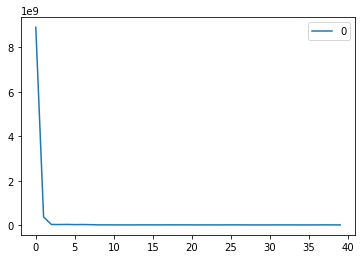

In [50]:
pd.DataFrame(model.loss_curve_).plot()


# Evaluation

In [51]:
y_predict = model.predict(X_test)


In [52]:
y_predict_random = random.predict(X_test)

In [53]:
mae = metrics.mean_absolute_error(y_test, y_predict)
r2 = metrics.r2_score(y_test, y_predict)
mse = metrics.mean_squared_error(y_test, y_predict)

print("Mean Absolute Error: ", mae)
print("Mean Squared Error: ", mse)
print("R2 Score: ", r2)
print("Accuracy score", model.score(X_test, y_test))

Mean Absolute Error:  4746.045511039311
Mean Squared Error:  50249807.91143799
R2 Score:  0.8587359650183376
Accuracy score 0.8587359650183376


In [54]:
mae = metrics.mean_absolute_error(y_test, y_predict_random)
r2 = metrics.r2_score(y_test, y_predict_random)

print("Mean Absolute Error: ", mae)
print("R2 Score: ", r2)
print("Accuracy score", random.score(X_test, y_test))


Mean Absolute Error:  4300.274752
R2 Score:  0.8628790085818416
Accuracy score 0.8628790085818416


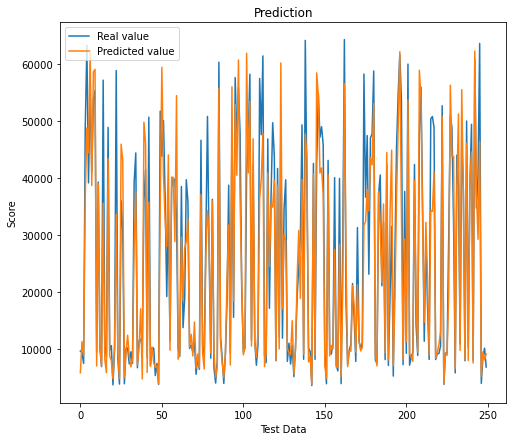

In [55]:

# visualize the predicted value with real value
plt.figure(figsize=(8, 7))

plt.plot(y_test, label='Real value')
plt.plot(y_predict, label='Predicted value')

plt.title('Prediction')
plt.xlabel('Test Data')
plt.ylabel('Score')
plt.legend()
plt.show()


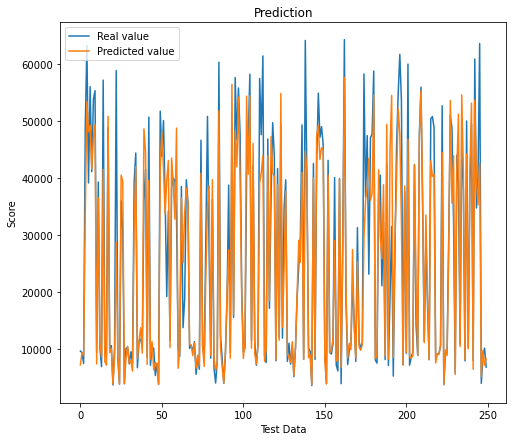

In [56]:

# visualize the predicted value with real value
plt.figure(figsize=(8, 7))

plt.plot(y_test, label='Real value')
plt.plot(y_predict_random, label='Predicted value')

plt.title('Prediction')
plt.xlabel('Test Data')
plt.ylabel('Score')
plt.legend()
plt.show()


In [57]:
pickle.dump(random, open("../models/model.pkl", "wb"))